## Linear Regression

### Importing the dataset

In [114]:
import pandas as pd
#variable and this is a function for uploading the dataset
dataset = pd.read_csv('Salary_Data_cleaned123.csv') 

In [115]:
dataset.head(5)#display 5 rows of dataset

#6,705 rows
# independent variables: Education Level, Job Title, Year of experience
# dependent variable: Salary

,Education Level,Job Title.1,Years of Experience,Salary
0,2,7,5.0,90000.0
1,3,6,3.0,65000.0
2,4,9,15.0,150000.0
3,2,6,7.0,60000.0
4,3,10,20.0,200000.0


### Getting the inputs and output

In [116]:
# [rows,columns]
X = dataset.iloc[:,:-1].values
X

array([[ 2.,  7.,  5.],
       [ 3.,  6.,  3.],
       [ 4.,  9., 15.],
       ...,
       [ 2.,  6.,  4.],
       [ 3.,  8., 14.],
       [ 1.,  5.,  1.]])

In [117]:
y = dataset.iloc[:,-1].values
y

array([ 90000.,  65000., 150000., ...,  55000., 140000.,  35000.])

### Creating the Training Set and the Test Set

In [118]:
# scikitlearn is a library
# model_selection is a module
# train_test_split is a function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=0)

In [119]:
X_train

array([[ 4.,  9., 11.],
       [ 4.,  9., 18.],
       [ 1.,  5.,  1.],
       ...,
       [ 4.,  9., 12.],
       [ 2.,  9., 30.],
       [ 2.,  9., 11.]])

In [120]:
X_test

array([[ 3.,  8., 10.],
       [ 3.,  8., 13.],
       [ 1.,  5.,  2.],
       ...,
       [ 3.,  9., 11.],
       [ 2.,  8., 12.],
       [ 4.,  9., 12.]])

In [121]:
y_train

array([160000., 180000.,  30000., ..., 170000., 183020., 160000.])

In [122]:
y_test

array([120000., 140010.,  35000., ..., 198000., 120000., 170000.])

## Part 2 - Building and training the model

### Building the model

In [123]:
# linear_model is the module
# `LinearRegression is a class` is defining that `LinearRegression` is a class within the `linear_model` module. It indicates that `LinearRegression` is a blueprint or template for creating objects that represent linear regression models.
# Class is a pre-coded blueprint of something we want to build from which objects are created.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the Model

In [124]:
# fit is a method inside LinearRegression class - they are like functions.
model.fit(X_train, y_train)

LinearRegression()

### Inference

In [125]:
y_pred = model.predict(X_test)
y_pred

array([131618.25710943, 136950.00213203,  29023.60038264, ...,
       162063.20710122, 133985.97126762, 165027.23796563])

#### Making the prediction of a single data point with Education level =2,Job Title=7, years of experience = 5 

In [126]:
print(model.predict([[2,7,5]]))


[92877.53123063]


## Part 3: Evaluating the Model

### R-Squared

In [127]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9225584685830469

### Adjusted R-Squared

In [128]:
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.9223847029927321

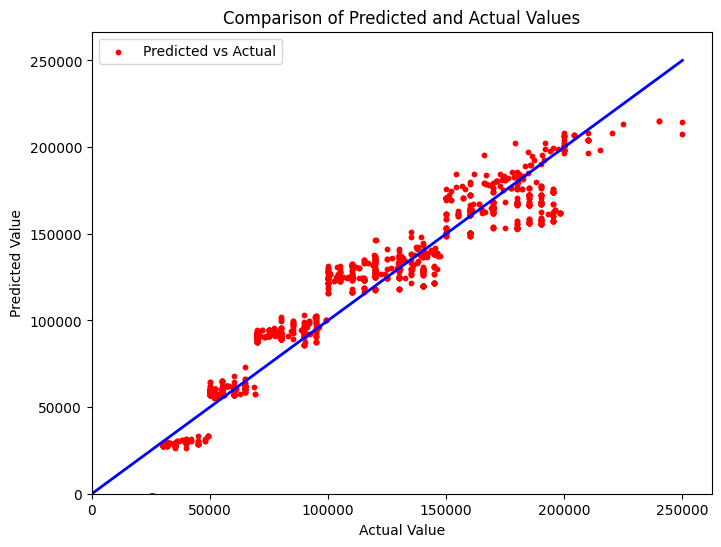

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', s=10, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linewidth=2)

# Set axes to start from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Comparison of Predicted and Actual Values")
plt.legend()
plt.show()

